<a href="https://colab.research.google.com/github/med-tz/elelction_Tunisie/blob/main/Source.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**chargement de tous les packages nécessaires**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns

from sklearn.model_selection import train_test_split

In [3]:
## Affichage de plus de lignes pour les output
pd.options.display.max_rows = 500

**chargement de la base de donnee**

In [ ]:
drive.mount('/content/drive')
Base=pd.read_excel('/content/drive/MyDrive/stat up/Base.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
Base=pd.read_excel("/content/Base.xlsx")

In [ ]:

Base.head(10)

,ID,BID,Kish1,Q1,Q2,Q3,Secteur,Block,Q4,Q5,Q6,Q7,Q8,Q8_AUTRES,Q9,Q9_AUTRES,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q19BIS,Q20,Q20BIS,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_7,Q21_8,Q21_9,Q21_10,Q22_1,...,Q22_9,Q23,Q25,Q26,Q27,Q28A,Q28B,Q30,Q31,Q32_1,Q32_2,Q32_3,Q34_A,Q34_B,Q34_C,Q34_D,Q34_E,Q34_F,Q34_G,Q34_H,Q34_I,Q34_J,Q34_K,Q35_A,Q35_B,Q35_C,Q35_D,Q35_E,Q35_F,Q35_G,Q35_H,Q52,Q53,Q54,Q55,Pondération1,Pondération2,Pondération3,PoidsInitial,Poids
0,1,1,1,1,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,27,NaN,1,3.0,NaN,NaN,NaN,3.0,2,1,NaN,1,1,1,4,4,98,NaN,2,2.0,3,1,3,2,2,2,3,2,2,3,2,...,2,1,2.0,2.0,2.0,4,5.0,6,2,3,6.0,5.0,3,2,3,3,2,2,3,2,2,3,4,2,4,3,2,3,5,2,2,10,1,3,1,1.693877,1.123561,1.033677,478.352606,602.470102
1,2,1,2,2,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,37,NaN,2,NaN,NaN,4.0,NaN,NaN,2,2,4.0,1,1,1,4,4,1,2.0,8,2.0,2,3,3,2,3,3,3,2,3,3,2,...,2,1,NaN,NaN,NaN,5,1.0,1,1,3,6.0,4.0,3,3,3,4,2,2,3,2,2,3,4,2,3,3,3,3,3,3,2,4,2,4,3,0.853806,0.645277,0.636774,956.705212,995.519830
2,3,1,2,1,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,22,NaN,1,2.0,NaN,NaN,NaN,3.0,1,2,4.0,1,1,98,4,3,98,NaN,96,2.0,3,3,99,3,99,99,3,3,99,99,3,...,3,1,NaN,NaN,NaN,2,10.0,3,3,6,8.0,9.0,3,2,5,4,5,5,4,3,5,5,4,3,3,3,3,3,3,2,2,10,1,6,2,1.849603,1.290227,1.213185,956.705212,1094.787094
3,4,1,3,2,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,53,NaN,1,3.0,NaN,NaN,NaN,1.0,2,1,NaN,1,98,98,2,4,2,2.0,1,1.0,1,3,3,3,3,3,3,3,3,3,2,...,3,2,98.0,1.0,98.0,5,98.0,3,5,3,97.0,NaN,1,5,5,5,5,5,5,5,5,5,2,2,2,5,5,2,5,5,5,5,2,4,3,0.855732,0.817558,0.559571,1435.057818,537.636292
4,5,1,3,1,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,27,NaN,1,2.0,NaN,NaN,NaN,1.0,2,2,4.0,1,1,1,3,4,96,1.0,2,1.0,99,1,2,2,99,99,3,3,99,99,3,...,3,1,NaN,NaN,NaN,1,9.0,4,5,3,8.0,5.0,4,1,2,4,5,5,4,4,5,5,3,3,3,3,3,5,5,2,5,9,1,4,2,1.693877,1.078874,1.017732,1435.057818,1642.180641
5,6,1,2,2,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,30,NaN,2,NaN,NaN,4.0,NaN,NaN,1,1,NaN,1,1,98,4,3,97,1.0,5,1.0,97,3,3,3,1,99,3,97,99,99,3,...,3,98,2.0,2.0,97.0,8,1.0,6,5,3,8.0,97.0,3,3,3,3,2,3,3,3,3,3,3,98,98,98,98,98,5,5,5,9,2,4,3,1.484786,1.023257,0.947754,956.705212,977.646335
6,7,1,2,1,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,53,NaN,1,3.0,NaN,NaN,NaN,3.0,2,1,NaN,1,1,1,2,1,9,2.0,2,1.0,3,1,3,3,2,2,3,3,3,3,2,...,3,1,2.0,2.0,97.0,9,1.0,4,2,8,4.0,3.0,3,1,4,2,2,2,3,3,3,4,2,2,3,3,2,4,3,4,2,7,2,3,2,0.893351,0.671736,0.662695,956.705212,722.904039
7,8,1,3,2,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,49,NaN,2,NaN,NaN,4.0,NaN,NaN,2,1,NaN,1,98,98,4,1,97,2.0,98,NaN,2,2,2,2,2,97,2,99,97,2,97,...,99,98,98.0,98.0,97.0,1,10.0,98,1,98,NaN,NaN,98,98,98,98,98,98,98,5,5,98,98,98,98,98,98,98,98,98,98,3,2,6,2,1.238651,1.247599,1.121917,1435.057818,1439.868275
8,9,1,6,1,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,59,NaN,1,3.0,NaN,NaN,NaN,1.0,1,1,NaN,1,1,1,1,1,2,1.0,9,2.0,3,3,2,2,3,3,3,2,2,3,1,...,2,2,2.0,1.0,97.0,9,4.0,4,1,3,6.0,97.0,3,3,1,1,3,3,3,1,2,3,1,2,3,4,4,4,4,3,2,10,2,4,2,0.787331,0.482712,0.297768,2870.115637,861.071485
9,10,1,5,2,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,55,NaN,2,NaN,NaN,4.0,NaN,NaN,2,1,NaN,1,1,2,2,1,2,1.0,5,1.0,2,1,3,3,1,1,3,2,3,3,1,...,2,1,7.0,2.0,97.0,10,97.0,4,3,6,8.0,97.0,3,1,2,2,1,2,4,2,5,3,3,3,98,4,2,4,5,4,98,5,2,5,1,0.719912,0.867008,0.866951,2391.763030,1665.694505


**split de la base en test et train**

In [ ]:
train,test = train_test_split(Base, test_size = 0.3, random_state = 123)
train=train.reset_index()
train=train.drop(['index'], axis=1)
test=test.reset_index()
test=test.drop(['index'], axis=1)

In [ ]:
train.head()

,ID,BID,Kish1,Q1,Q2,Q3,Secteur,Block,Q4,Q5,Q6,Q7,Q8,Q8_AUTRES,Q9,Q9_AUTRES,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q19BIS,Q20,Q20BIS,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_7,Q21_8,Q21_9,Q21_10,Q22_1,...,Q22_9,Q23,Q25,Q26,Q27,Q28A,Q28B,Q30,Q31,Q32_1,Q32_2,Q32_3,Q34_A,Q34_B,Q34_C,Q34_D,Q34_E,Q34_F,Q34_G,Q34_H,Q34_I,Q34_J,Q34_K,Q35_A,Q35_B,Q35_C,Q35_D,Q35_E,Q35_F,Q35_G,Q35_H,Q52,Q53,Q54,Q55,Pondération1,Pondération2,Pondération3,PoidsInitial,Poids
0,3978,332,3,2,8,Nefza,Ouachtata,Ouachtata 2,2,998,5.0,2,NaN,NaN,1.0,NaN,NaN,2,1,NaN,1,2,98,2,98,98,NaN,96,1.0,97,3,3,3,3,3,3,1,99,99,3,...,3,2,1.0,1.0,1.0,3,98.0,98,98,8,3.0,5.0,2,3,3,3,3,3,2,98,5,5,2,3,3,3,3,3,3,3,3,1,3,6,2,1.013224,0.859502,0.801149,539.350085,853.381981
1,7853,655,2,1,14,Meknassy,Meknassy Est,Meknassy Est 10,1,50,NaN,2,NaN,NaN,1.0,NaN,NaN,2,1,NaN,1,1,1,1,3,98,NaN,98,NaN,99,99,99,99,99,99,99,99,99,99,99,...,99,1,99.0,99.0,99.0,3,10.0,1,4,3,6.0,5.0,98,5,5,5,5,5,5,98,5,98,5,5,5,5,5,5,5,98,5,5,2,6,2,0.571798,0.744608,0.662738,414.490134,265.472835
2,237,20,2,1,1,Ezzouhour,Bach-Hamba,Bach-Hamba 19,1,40,NaN,1,6.0,NaN,NaN,NaN,4.0,2,1,NaN,1,1,1,2,1,12,2.0,8,2.0,3,3,2,3,2,2,3,1,3,3,3,...,1,1,1.0,1.0,97.0,9,1.0,1,2,3,8.0,6.0,4,4,2,4,2,2,4,1,5,4,4,4,3,3,2,5,5,2,1,5,2,4,2,0.974041,0.819628,0.685272,723.091149,406.574018
3,5543,462,5,1,15,Sidi El Héni,Sidi El Héni Centre,Sidi El Héni Centre 4,1,19,NaN,2,NaN,NaN,1.0,NaN,NaN,2,2,4.0,1,1,1,4,4,2,2.0,96,1.0,3,3,3,2,3,3,3,3,3,3,2,...,3,1,NaN,NaN,NaN,10,1.0,3,2,3,6.0,8.0,4,2,4,2,4,4,4,4,4,4,1,2,4,4,4,4,4,3,4,4,1,6,2,2.152800,1.866211,1.865003,1794.217343,1073.801664
4,3566,298,5,2,5,Saouaf,Deghafla Ouest,Deghafla Ouest,2,54,NaN,2,NaN,NaN,1.0,NaN,NaN,2,1,NaN,1,98,98,4,98,98,NaN,98,NaN,97,99,99,99,99,99,99,99,99,99,99,...,99,98,98.0,97.0,97.0,3,1.0,98,5,8,2.0,97.0,98,5,5,5,5,5,5,5,5,5,2,5,5,5,5,5,5,5,5,1,2,6,2,0.596075,0.588361,1.177493,539.783491,833.638926


In [ ]:
test.head()

,ID,BID,Kish1,Q1,Q2,Q3,Secteur,Block,Q4,Q5,Q6,Q7,Q8,Q8_AUTRES,Q9,Q9_AUTRES,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q19BIS,Q20,Q20BIS,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_7,Q21_8,Q21_9,Q21_10,Q22_1,...,Q22_9,Q23,Q25,Q26,Q27,Q28A,Q28B,Q30,Q31,Q32_1,Q32_2,Q32_3,Q34_A,Q34_B,Q34_C,Q34_D,Q34_E,Q34_F,Q34_G,Q34_H,Q34_I,Q34_J,Q34_K,Q35_A,Q35_B,Q35_C,Q35_D,Q35_E,Q35_F,Q35_G,Q35_H,Q52,Q53,Q54,Q55,Pondération1,Pondération2,Pondération3,PoidsInitial,Poids
0,1249,105,4,1,3,Bou Mhel El Bassatine,El Bassatine,El Bassatine 21,1,54,NaN,1,7.0,NaN,NaN,NaN,1.0,2,1,NaN,1,1,1,1,4,1,1.0,1,1.0,1,3,1,3,3,3,3,3,3,3,3,...,3,2,1.0,1.0,6.0,2,8.0,4,4,3,6.0,8.0,2,3,2,3,3,4,4,3,3,3,4,3,3,4,3,3,3,4,3,7,2,4,2,1.082103,0.892018,0.760968,1766.159371,766.218477
1,2852,238,4,2,26,Takelsa,Takelsa Centre,Takelsa Centre 9,1,63,NaN,2,NaN,NaN,4.0,NaN,NaN,2,1,NaN,1,1,98,4,1,98,NaN,8,2.0,2,3,3,3,3,2,2,2,2,2,3,...,3,2,98.0,2.0,98.0,7,98.0,3,3,3,4.0,2.0,3,3,5,5,5,98,98,98,98,98,2,5,5,5,5,5,5,98,5,2,2,6,2,0.829884,0.835953,1.023971,683.124038,680.987430
2,6125,511,2,1,17,Bou Merdès,Bou Merdes,Bou Merdes 5,1,37,NaN,1,7.0,NaN,NaN,NaN,5.0,2,1,NaN,1,98,98,4,1,5,2.0,3,2.0,3,3,1,3,99,99,1,3,3,3,3,...,1,1,1.0,1.0,1.0,1,5.0,3,4,6,2.0,3.0,2,4,1,3,5,5,3,1,5,4,1,4,4,4,4,4,5,5,3,2,2,4,2,0.997230,0.850363,0.724169,429.094266,509.220807
3,7282,607,5,2,27,Skhira,Skhira,Skhira 21,1,998,5.0,2,NaN,NaN,4.0,NaN,NaN,2,1,NaN,1,98,98,2,2,96,1.0,10,1.0,1,3,3,99,99,99,2,99,99,2,99,...,99,1,97.0,97.0,97.0,8,1.0,98,1,8,96.0,97.0,1,1,5,2,5,5,98,5,5,1,1,5,1,5,5,1,5,5,1,1,2,3,1,1.820406,3.303099,4.449546,1156.321315,2068.529999
4,4452,371,3,2,10,Tajerouine,Cité Bourguiba,Cité Bourguiba 2,1,21,NaN,2,NaN,NaN,1.0,NaN,NaN,2,1,NaN,1,1,1,2,4,97,1.0,97,1.0,3,3,3,3,3,3,3,3,3,3,3,...,3,1,97.0,97.0,6.0,1,4.0,4,5,3,5.0,8.0,4,3,5,3,2,5,2,2,5,2,2,3,4,2,5,2,5,2,2,9,1,6,2,0.704232,1.201245,1.506286,456.050537,494.879557


**Stat desc**

In [ ]:
print("Taille de la base : ",Base.shape)

Taille de la base :  (11000, 87)


87 features

*  **type des variables**




In [ ]:
Base.dtypes

ID                int64
BID               int64
Kish1             int64
Q1                int64
Q2                int64
Q3               object
Secteur          object
Block            object
Q4                int64
Q5                int64
Q6              float64
Q7                int64
Q8              float64
Q8_AUTRES        object
Q9              float64
Q9_AUTRES        object
Q10             float64
Q11               int64
Q12               int64
Q13             float64
Q14               int64
Q15               int64
Q16               int64
Q17               int64
Q18               int64
Q19               int64
Q19BIS          float64
Q20               int64
Q20BIS          float64
Q21_1             int64
Q21_2             int64
Q21_3             int64
Q21_4             int64
Q21_5             int64
Q21_6             int64
Q21_7             int64
Q21_8             int64
Q21_9             int64
Q21_10            int64
Q22_1             int64
Q22_2             int64
Q22_3           

*   **Analyse de la Target** 

Plusieurs features peuvent etre traitées comme target dans cette base. On fera le Stat descriptives des features qui peuvent etre traitées comme target.

1.   Q19: Imaginons que les élections législatives pour élire un député à l’assemblé des
représentants du peuple aient lieu dimanche prochain et que vous ayez le choix entre
les listes suivantes, pour laquelle y aurait-il le plus de chances que vous votiez ?

refus                   3028
Ne sait pas             2239
Ennahda                 1227
autre                    989
Nidaa Tounes             879
96                       752
Front Populaire          558
Courant Démocratique     270
Ne connait pas           236
Afek Tounes              188
Courant de l`Amour       149
Machrou Tounes           135
UPL                       96
95                        95
Al Joumhouri              82
Irada                     49
Albadil                   28
Name: Q19, dtype: int64


Text(0.5, 1.0, 'Q19')

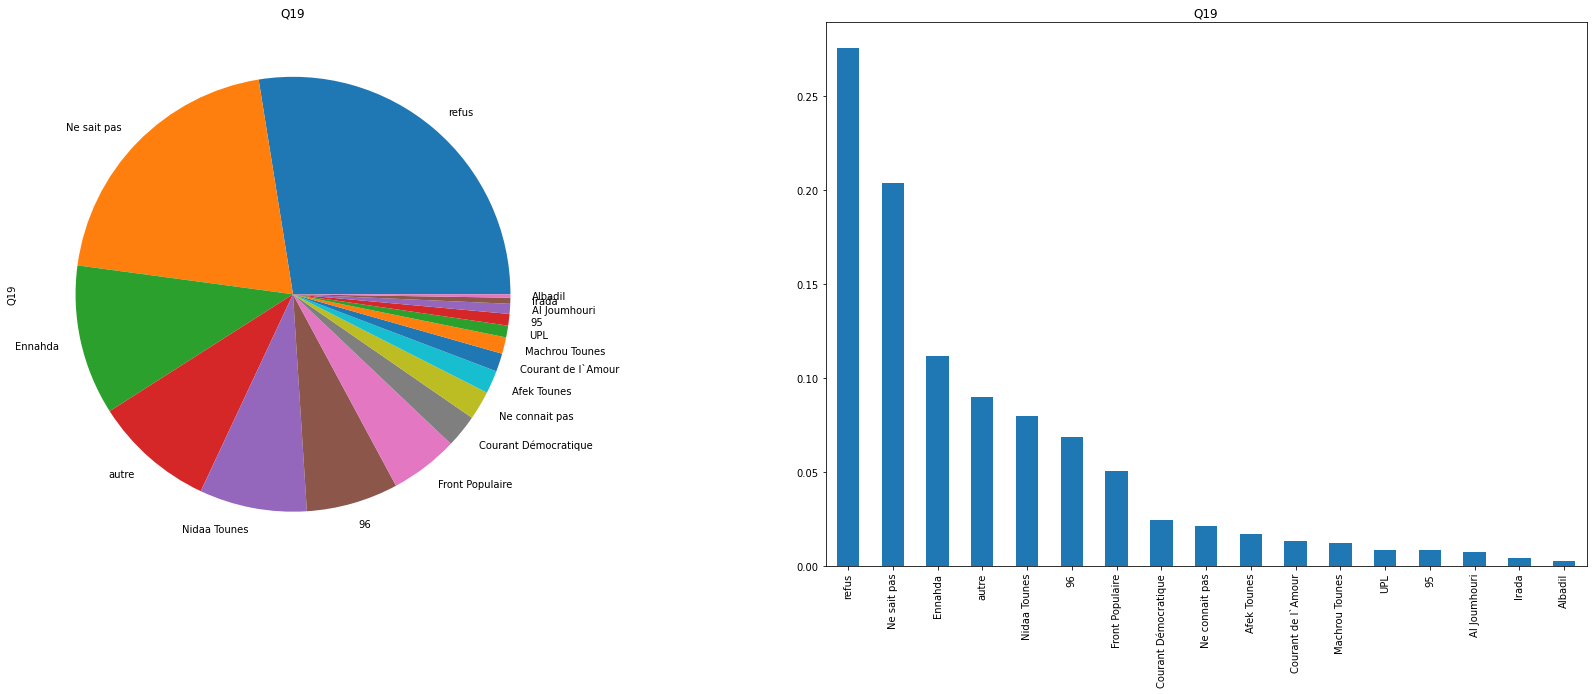

In [ ]:
copy = Base.copy()
varc='Q19'
Dict={1:"Nidaa Tounes",2:"Ennahda",3:"Front Populaire",4:"UPL",5:"Afek Tounes",6:"Al Joumhouri",7:"Machrou Tounes",8:"Irada",9:"Courant Démocratique",
      10:"Courant de l`Amour",11:"Albadil",12:"autre",98:"refus",97:"Ne sait pas",99:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
#Apercu générale sur la variable
print(copy[varc].value_counts())

plt.figure(figsize=(30,10))

#Distribution de la variable
plt.subplot(1,2,1)
copy[varc].value_counts(normalize=True).plot(kind='pie')
plt.title(varc)

#Distribution de la variable  
plt.subplot(1,2,2)
copy[varc].value_counts(normalize=True).plot(kind='bar')
plt.title(varc)

2.   Q20: Imaginons que les élections présidentielles pour élire le président de la
république aient lieu dimanche prochain et que vous ayez le choix entre les
personnalités suivantes, pour laquelle y aurait-il le plus de chances que vous votiez ?


refus                2076
Youssef Chahed       1557
Ne sait pas          1466
Moncef Marzouki      1310
Samia Abbou           807
96                    681
Hamma Hammani         653
Beji Caïd Essebsi     586
Mehdi Jomaa           577
Kamel Morjan          359
Mohammed Abbou        309
Rached Ghannouchi     276
Ne connait pas        174
Mohsen Marzouk        123
95                     46
Name: Q20, dtype: int64


Text(0.5, 1.0, 'Q20')

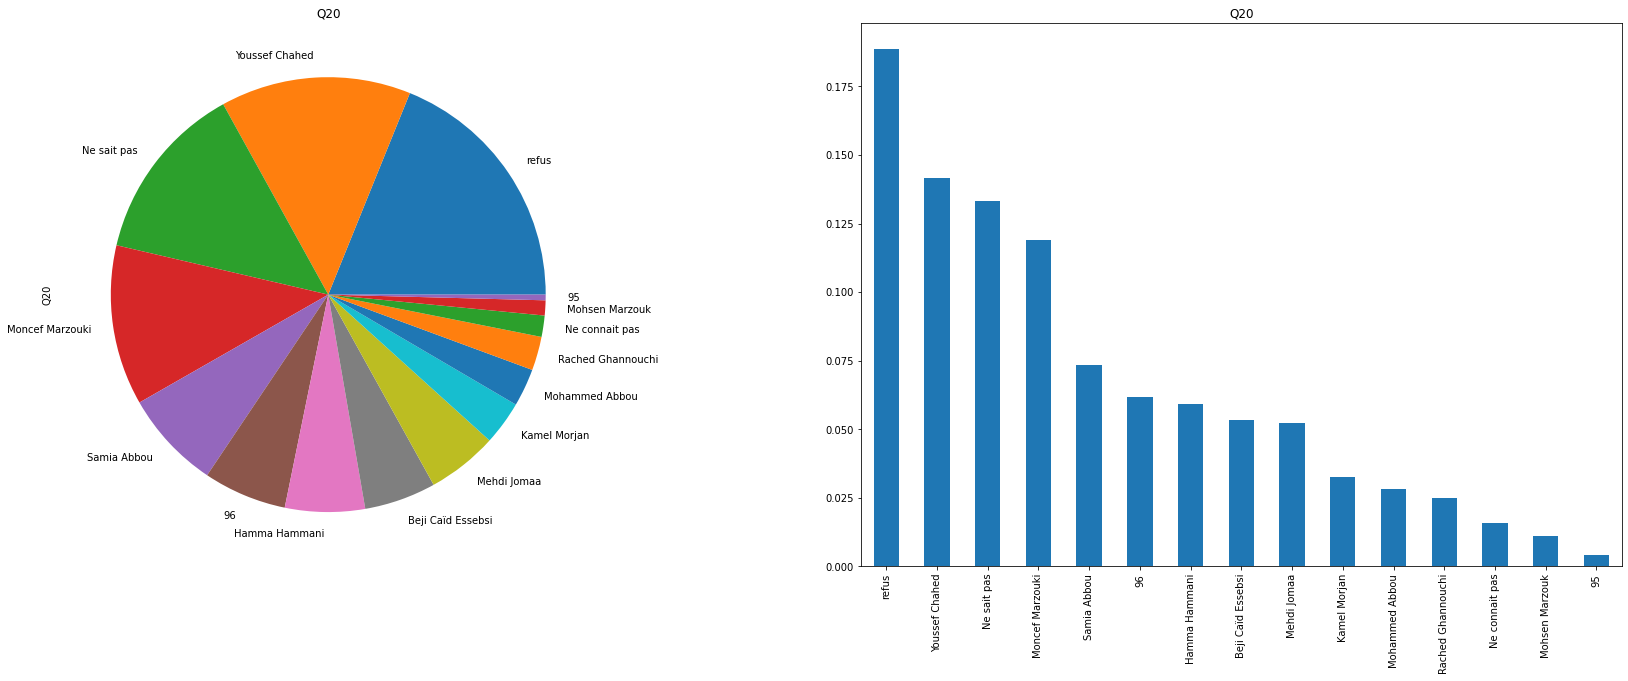

In [ ]:
copy = Base.copy()
varc='Q20'
Dict={1:"Beji Caïd Essebsi",2:"Moncef Marzouki",3:"Mehdi Jomaa",4:"Rached Ghannouchi",5:"Samia Abbou",6:"Mohammed Abbou",7:"Hamma Hammani",8:"Youssef Chahed",9:"Kamel Morjan",
      10:"Mohsen Marzouk",98:"refus",97:"Ne sait pas",99:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
#Apercu générale sur la variable
print(copy[varc].value_counts())

plt.figure(figsize=(30,10))

#Distribution de la variable
plt.subplot(1,2,1)
copy[varc].value_counts(normalize=True).plot(kind='pie')
plt.title(varc)

#Distribution de la variable  
plt.subplot(1,2,2)
copy[varc].value_counts(normalize=True).plot(kind='bar')
plt.title(varc)

In [5]:
Base["groupe d'age"]= pd.cut(Base.Q5,bins=[0,25,50,75,100])

In [7]:
Base

,ID,BID,Kish1,Q1,Q2,Q3,Secteur,Block,Q4,Q5,Q6,Q7,Q8,Q8_AUTRES,Q9,Q9_AUTRES,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q19BIS,Q20,Q20BIS,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_7,Q21_8,Q21_9,Q21_10,Q22_1,...,Q23,Q25,Q26,Q27,Q28A,Q28B,Q30,Q31,Q32_1,Q32_2,Q32_3,Q34_A,Q34_B,Q34_C,Q34_D,Q34_E,Q34_F,Q34_G,Q34_H,Q34_I,Q34_J,Q34_K,Q35_A,Q35_B,Q35_C,Q35_D,Q35_E,Q35_F,Q35_G,Q35_H,Q52,Q53,Q54,Q55,Pondération1,Pondération2,Pondération3,PoidsInitial,Poids,groupe d'age
0,1,1,1,1,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,27,NaN,1,3.0,NaN,NaN,NaN,3.0,2,1,NaN,1,1,1,4,4,98,NaN,2,2.0,3,1,3,2,2,2,3,2,2,3,2,...,1,2.0,2.0,2.0,4,5.0,6,2,3,6.0,5.0,3,2,3,3,2,2,3,2,2,3,4,2,4,3,2,3,5,2,2,10,1,3,1,1.693877,1.123561,1.033677,478.352606,602.470102,"(25, 50]"
1,2,1,2,2,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,37,NaN,2,NaN,NaN,4.0,NaN,NaN,2,2,4.0,1,1,1,4,4,1,2.0,8,2.0,2,3,3,2,3,3,3,2,3,3,2,...,1,NaN,NaN,NaN,5,1.0,1,1,3,6.0,4.0,3,3,3,4,2,2,3,2,2,3,4,2,3,3,3,3,3,3,2,4,2,4,3,0.853806,0.645277,0.636774,956.705212,995.519830,"(25, 50]"
2,3,1,2,1,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,22,NaN,1,2.0,NaN,NaN,NaN,3.0,1,2,4.0,1,1,98,4,3,98,NaN,96,2.0,3,3,99,3,99,99,3,3,99,99,3,...,1,NaN,NaN,NaN,2,10.0,3,3,6,8.0,9.0,3,2,5,4,5,5,4,3,5,5,4,3,3,3,3,3,3,2,2,10,1,6,2,1.849603,1.290227,1.213185,956.705212,1094.787094,"(0, 25]"
3,4,1,3,2,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,53,NaN,1,3.0,NaN,NaN,NaN,1.0,2,1,NaN,1,98,98,2,4,2,2.0,1,1.0,1,3,3,3,3,3,3,3,3,3,2,...,2,98.0,1.0,98.0,5,98.0,3,5,3,97.0,NaN,1,5,5,5,5,5,5,5,5,5,2,2,2,5,5,2,5,5,5,5,2,4,3,0.855732,0.817558,0.559571,1435.057818,537.636292,"(50, 75]"
4,5,1,3,1,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,27,NaN,1,2.0,NaN,NaN,NaN,1.0,2,2,4.0,1,1,1,3,4,96,1.0,2,1.0,99,1,2,2,99,99,3,3,99,99,3,...,1,NaN,NaN,NaN,1,9.0,4,5,3,8.0,5.0,4,1,2,4,5,5,4,4,5,5,3,3,3,3,3,5,5,2,5,9,1,4,2,1.693877,1.078874,1.017732,1435.057818,1642.180641,"(25, 50]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,11012,918,2,2,22,Tozeur,EL-Hadher,EL-Hadher 14,2,33,NaN,2,NaN,NaN,4.0,NaN,NaN,2,2,4.0,1,1,98,3,4,98,NaN,8,2.0,3,3,3,3,3,3,3,2,3,3,3,...,98,NaN,NaN,NaN,9,3.0,98,1,96,97.0,NaN,98,5,5,5,5,5,5,98,5,5,5,5,5,5,5,5,5,5,98,2,2,98,3,0.416266,0.318999,0.319190,128.243417,171.101413,"(25, 50]"
10996,11013,918,2,1,22,Tozeur,EL-Hadher,EL-Hadher 14,2,37,NaN,1,6.0,NaN,NaN,NaN,4.0,1,1,NaN,1,1,1,2,4,98,NaN,2,1.0,3,1,3,3,3,3,3,3,3,3,3,...,1,2.0,2.0,97.0,4,3.0,3,5,8,5.0,97.0,4,1,2,4,3,5,3,3,2,2,1,3,3,2,2,2,5,3,3,5,2,6,2,0.165501,0.119520,0.118306,128.243417,155.802661,"(25, 50]"
10997,11014,918,2,2,22,Tozeur,EL-Hadher,EL-Hadher 14,2,58,NaN,2,NaN,NaN,1.0,NaN,NaN,2,1,NaN,1,98,98,4,98,98,NaN,98,NaN,97,97,97,97,97,97,97,97,97,97,97,...,98,98.0,98.0,97.0,1,10.0,98,5,98,NaN,NaN,98,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,2,1,6,2,0.193485,0.180548,0.173471,128.243417,112.201855,"(50, 75]"
10998,11015,918,3,1,22,Tozeur,EL-Hadher,EL-Hadher 14,2,29,NaN,2,NaN,NaN,1.0,NaN,NaN,2,2,4.0,1,1,98,4,4,97,1.0,97,1.0,3,3,3,3,3,3,3,3,3,3,3,...,1,NaN,NaN,NaN,3,1.0,4,5,3,5.0,8.0,98,5,5,5,5,5,5,98,5,5,1,5,5,5,5,5,5,5,5,4,2,6,2,0.274733,0.205663,0.203525,192.365125,245.871656,"(25, 50]"


In [ ]:
copy = Base.copy()
varc='Q20'
Dict={1:"Beji Caïd Essebsi",2:"Moncef Marzouki",3:"Mehdi Jomaa",4:"Rached Ghannouchi",5:"Samia Abbou",6:"Mohammed Abbou",7:"Hamma Hammani",8:"Youssef Chahed",9:"Kamel Morjan",
      10:"Mohsen Marzouk",98:"refus",97:"Ne sait pas",99:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)
#Apercu générale sur la variable
print(copy.groupby("varc").value_counts

plt.figure(figsize=(30,10))

#Distribution de la variable
plt.subplot(1,2,1)
copy[varc].value_counts(normalize=True).plot(kind='pie')
plt.title(varc)

#Distribution de la variable  
plt.subplot(1,2,2)
copy[varc].value_counts(normalize=True).plot(kind='bar')
plt.title(varc)

In [9]:
copy = Base.copy()
varc='Q20'
Dict={1:"Beji Caïd Essebsi",2:"Moncef Marzouki",3:"Mehdi Jomaa",4:"Rached Ghannouchi",5:"Samia Abbou",6:"Mohammed Abbou",7:"Hamma Hammani",8:"Youssef Chahed",9:"Kamel Morjan",
      10:"Mohsen Marzouk",98:"refus",97:"Ne sait pas",99:"Ne connait pas"}
copy.replace(to_replace={varc: Dict},inplace=True)

In [14]:
a=copy.groupby(["groupe d'age",varc]).agg({"ID":"count"})

In [22]:
a.reset_index()

,groupe d'age,Q20,ID
0,"(0, 25]",95,6
1,"(0, 25]",96,122
2,"(0, 25]",Beji Caïd Essebsi,95
3,"(0, 25]",Hamma Hammani,98
4,"(0, 25]",Kamel Morjan,18
5,"(0, 25]",Mehdi Jomaa,52
6,"(0, 25]",Mohammed Abbou,18
7,"(0, 25]",Mohsen Marzouk,21
8,"(0, 25]",Moncef Marzouki,247
9,"(0, 25]",Ne connait pas,8


In [19]:
b=a.reset_index()["groupe d'age"]

In [20]:
list=
for i in b.values:

[(0, 25], (0, 25], (0, 25], (0, 25], (0, 25], ..., (75, 100], (75, 100], (75, 100], (75, 100], (75, 100]]
Length: 60
Categories (4, interval[int64]): [(0, 25] < (25, 50] < (50, 75] < (75, 100]]